In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met import plotting
from quant_met import hamiltonians

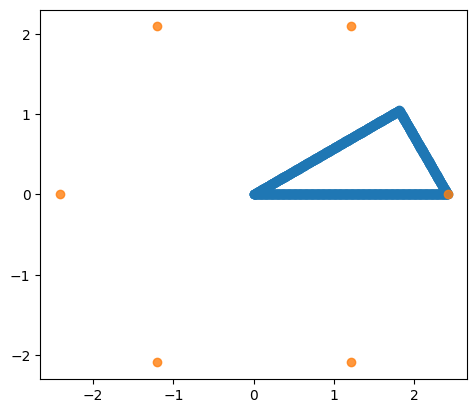

In [2]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

BZ_path_plot = plotting.plot_into_bz(all_K_points, band_path)

egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=0, a=lattice_constant, mu=-2.5, U_gr=1, U_x=1)

band_structure = egx_h.calculate_bandstructure(band_path)

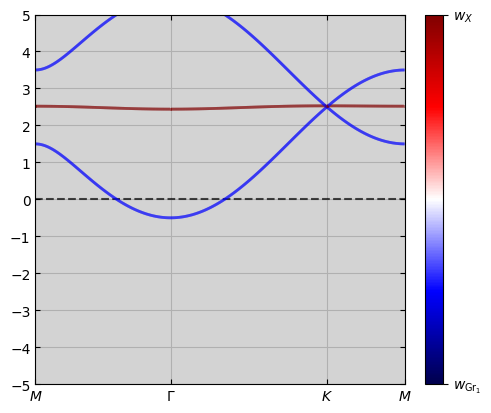

In [11]:
fig = plotting.plot_nonint_bandstructure(
    bands=band_structure[['band_0', 'band_1', 'band_2']].to_numpy().T,
    overlaps=band_structure[['wx_0', 'wx_1', 'wx_2']].to_numpy().T,
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks
)

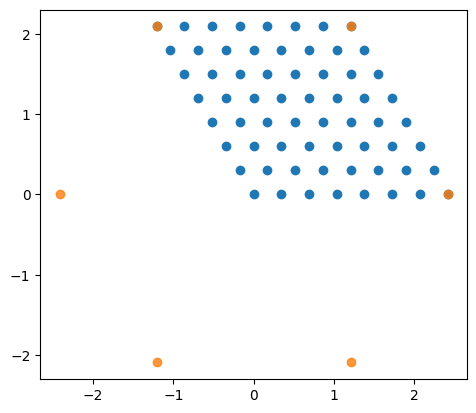

In [20]:
print()

BZ_grid = find_fixpoint.generate_k_space_grid(8, 8, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

Time taken to solve the gap equation: 9.84 seconds


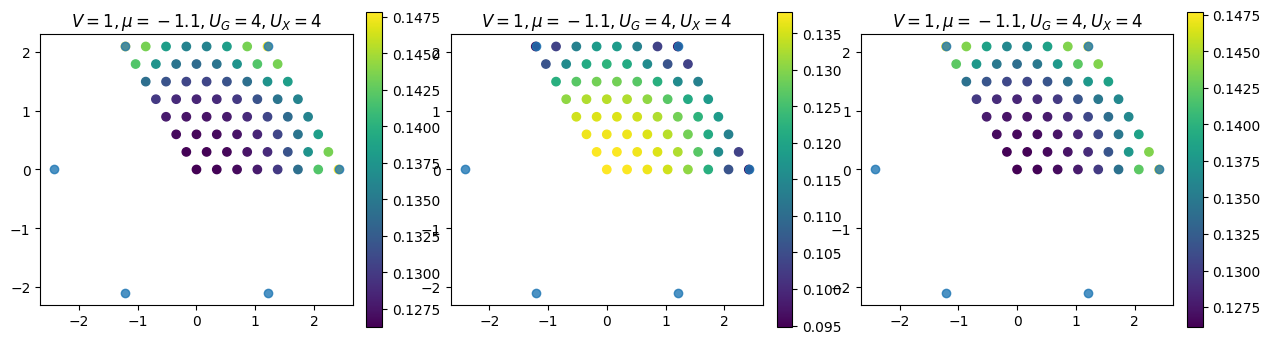

In [21]:
import time

start = time.time()
egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=1, a=lattice_constant, mu=-1.1, U_gr=4, U_x=4)
delta = find_fixpoint.solve_gap_equation(k_points=BZ_grid, hamiltonian=egx_h)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
delta_interpolated = find_fixpoint.interpolate_gap(delta, band_path)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(3*5, 5))

for delta, ax in zip(delta.data[['delta_0', 'delta_1', 'delta_2']].to_numpy().T, axs):
    ax.set_title(f"$V = {egx_h.V}, \\mu = {egx_h.mu}, U_G = {egx_h.U_gr}, U_X = {egx_h.U_x}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

Text(0.5, 1.0, '$V = 1, \\mu = -1.1$')

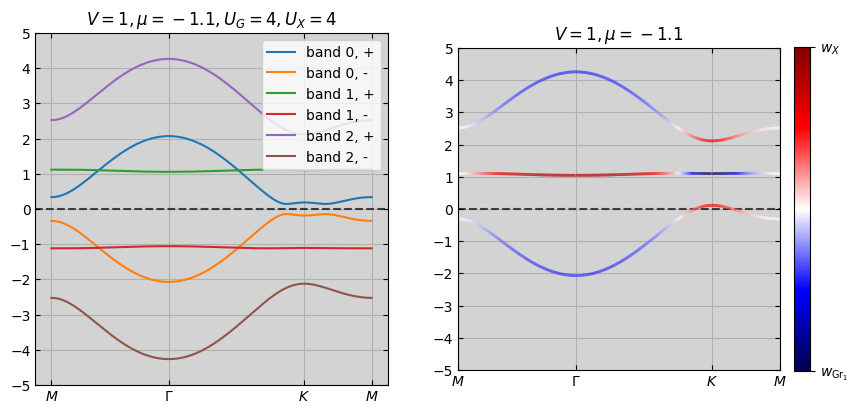

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

band_structure = egx_h.calculate_bandstructure(band_path)

plotting.plot_bcs_bandstructure(
    non_interacting_bands=band_structure[['band_0', 'band_1', 'band_2']].to_numpy().T,
    deltas=delta_interpolated.data[['delta_0', 'delta_1', 'delta_2']].to_numpy().T,
    k_point_list=band_path_plot,
    ticks=ticks,
    labels=labels,
    fig=fig,
    ax=axs[0])
axs[0].set_title(f"$V = {egx_h.V}, \\mu = {egx_h.mu}, U_G = {egx_h.U_gr}, U_X = {egx_h.U_x}$")

bands = band_structure[['band_0', 'band_1', 'band_2']].to_numpy().T
overlaps = band_structure[['wx_0', 'wx_1', 'wx_2']].to_numpy().T
plotting.plot_nonint_bandstructure(
    bands=band_structure[['band_0', 'band_1', 'band_2']].to_numpy().T,
    overlaps=band_structure[['wx_0', 'wx_1', 'wx_2']].to_numpy().T,
    fig=fig,
    ax=axs[1],
    k_point_list=band_path_plot,
    labels=labels,
    ticks=ticks
)
axs[1].set_title(f"$V = {egx_h.V}, \\mu = {egx_h.mu}$")